In [72]:
import pandas as pd

In [73]:
import numpy as np

In [74]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')

In [75]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [76]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [77]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

No null value present in dataset

In [78]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [79]:
df['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [80]:
df['discipline'].unique()

array(['B', 'A'], dtype=object)

In [81]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

rank,discipline and sex are categorical data

rank-ordinal,  didcipline and sex are nominal categorical data

yrs.since.phd and yrs.service are countinous data


In [82]:
from sklearn.preprocessing import OrdinalEncoder

In [89]:
enc = OrdinalEncoder()

In [90]:
print(enc)

OrdinalEncoder()


In [95]:
dataMapping={
    "Prof":1,
    "AsstProf":2,
    "AssocProf":3
}

In [96]:
df['rank']=df['rank'].map(dataMapping)
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,B,19,18,Male,139750
1,1,B,20,16,Male,173200
2,2,B,4,3,Male,79750
3,1,B,45,39,Male,115000
4,1,B,40,41,Male,141500
...,...,...,...,...,...,...
392,1,A,33,30,Male,103106
393,1,A,31,19,Male,150564
394,1,A,42,25,Male,101738
395,1,A,25,15,Male,95329


In [97]:
dataMapping={
    "A":1,
    "B":2   
}

In [98]:
df['discipline']=df['discipline'].map(dataMapping)
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,2,19,18,Male,139750
1,1,2,20,16,Male,173200
2,2,2,4,3,Male,79750
3,1,2,45,39,Male,115000
4,1,2,40,41,Male,141500
...,...,...,...,...,...,...
392,1,1,33,30,Male,103106
393,1,1,31,19,Male,150564
394,1,1,42,25,Male,101738
395,1,1,25,15,Male,95329


In [99]:
dataMapping={
    "Male":1,
    "Female":2   
}

In [100]:
df['sex']=df['sex'].map(dataMapping)
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,2,19,18,1,139750
1,1,2,20,16,1,173200
2,2,2,4,3,1,79750
3,1,2,45,39,1,115000
4,1,2,40,41,1,141500
...,...,...,...,...,...,...
392,1,1,33,30,1,103106
393,1,1,31,19,1,150564
394,1,1,42,25,1,101738
395,1,1,25,15,1,95329


In [101]:
import matplotlib.pyplot as plt

In [102]:
%matplotlib inline

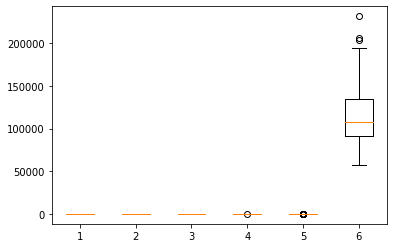

In [104]:
plt.boxplot(df);

It shows that there are outliers present in dataset.

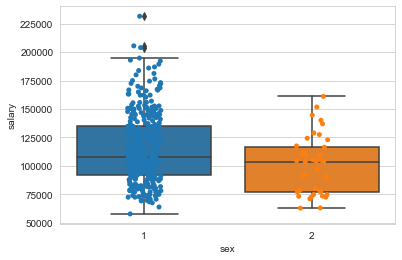

In [105]:
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='sex',y='salary',data=df)
ax = sns.stripplot(x="sex", y="salary",data=df)

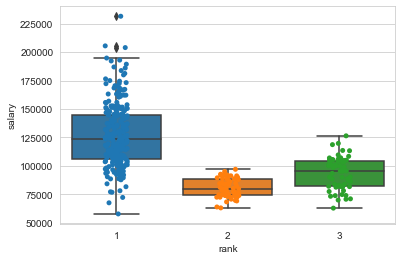

In [106]:
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='rank',y='salary',data=df)
ax = sns.stripplot(x="rank", y="salary",data=df)

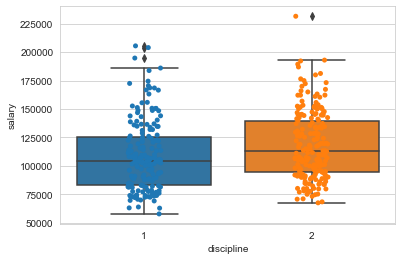

In [107]:
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='discipline',y='salary',data=df)
ax = sns.stripplot(x="discipline", y="salary",data=df)

Before we process for the detailed analysis lets first fit a simple linear regression model where we predict the salary based on gender category. To check the current levels of sex we can use the levels( ) function and supply the column name. By default, the R treats the first level as a reference level (here female)

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
x=df.drop('salary',axis=1)

In [132]:
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,1,2,19,18,1
1,1,2,20,16,1
2,2,2,4,3,1
3,1,2,45,39,1
4,1,2,40,41,1
...,...,...,...,...,...
392,1,1,33,30,1
393,1,1,31,19,1
394,1,1,42,25,1
395,1,1,25,15,1


In [133]:
y=df['salary']
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [134]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
L=LinearRegression()